In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [4]:
#preprocessing
df=df.iloc[:,1:] #to eliminate the 0th column
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [5]:
df.shape

(100, 3)

In [6]:
#steps:

# 0. Preprocess +EDA + Feature selection
# 1. Extract input and output columns
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

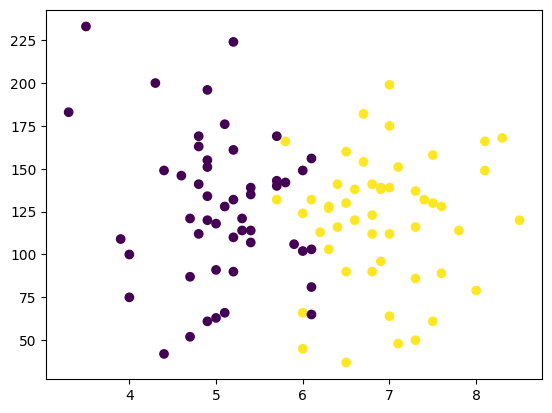

In [7]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
#sns.scatterplot(data=df, x='cgpa', y='iq') #both are same, but this also shows the label of the axis
plt.show()

In [8]:
#Train test split, splits the dataset into training set and testing set

X=df.iloc[:,:2] #1st 2 colns
Y=df.iloc[:,-1] #last coln

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.1)

In [10]:
X_train

,cgpa,iq
92,5.2,110.0
22,4.9,120.0
71,6.1,132.0
42,7.6,89.0
52,7.0,175.0
...,...,...
73,4.9,61.0
28,5.2,90.0
7,5.0,63.0
46,5.3,114.0


In [11]:
#Scale the values
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train)

In [14]:
X_train

array([[-0.7330218 , -0.2898282 ],
       [-0.99516205, -0.03459789],
       [ 0.05339894,  0.27167849],
       [ 1.36410017, -0.82581187],
       [ 0.83981968,  1.36916885],
       [ 0.57767943,  1.54783007],
       [ 1.27672009,  0.93527731],
       [ 0.40291927, -2.15300951],
       [ 0.83981968,  0.45033971],
       [ 1.27672009, -1.54045675],
       [-0.03398114, -1.94882526],
       [-0.55826164, -0.18773608],
       [ 1.18934001,  0.27167849],
       [ 1.10195993,  0.39929365],
       [-0.55826164,  0.34824759],
       [-0.99516205,  0.75661609],
       [-0.90778196, -0.08564395],
       [ 0.57767943,  0.83318519],
       [-0.03398114, -0.49401246],
       [ 1.7136205 , -1.08104218],
       [-0.29612139,  0.47586274],
       [-1.08254213,  1.06289247],
       [-0.7330218 ,  1.01184641],
       [-0.03398114,  0.70557003],
       [-0.20874131,  0.52690881],
       [ 1.10195993, -0.13669001],
       [ 1.80100058,  0.70557003],
       [-2.39324336,  1.5733531 ],
       [-2.2184832 ,

In [15]:
X_test=scaler.fit_transform(X_test)

In [16]:
X_test

array([[-0.77794407, -0.06636974],
       [ 1.4739993 , -2.031935  ],
       [-1.59683257, -1.11296942],
       [-0.67558301,  1.33760545],
       [-0.26613876, -0.57690617],
       [ 0.14330549, -0.01531609],
       [ 0.96219399,  0.41863987],
       [-0.9826662 ,  0.06126437],
       [ 1.4739993 ,  1.41418592],
       [ 0.24566655,  0.5718008 ]])

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf=LogisticRegression()

In [19]:
#model training
clf.fit(X_train, Y_train)

LogisticRegression()

In [20]:
Y_pred=clf.predict(X_test)

In [21]:
Y_test

51    0
64    1
18    0
80    0
2     0
6     0
38    1
39    0
26    1
85    1
Name: placement, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(Y_test, Y_pred)

0.9

In [34]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

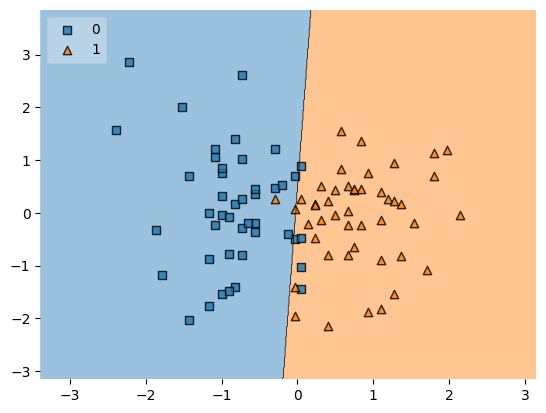

In [35]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [36]:
import pickle

In [37]:
pickle.dump(clf, open("model.pkl", "wb"))